# Explorando q tentando trabalhar seguindo essas série de vídeos:


https://www.youtube.com/watch?v=ZjRkGSBCVwM&list=PLZlkyCIi8bMot7zPA18szWVAmChYLoAa3&ab_channel=SejaUmDataScientist



# Imports:


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#buscar na documentação as inf e requesitos de entrada de dados
from sklearn import linear_model as lm
from sklearn import model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn import metrics as m
from sklearn.metrics import mean_absolute_error

# Loading Preparation

In [15]:
df_raw = pd.read_csv('kc_house_data.csv')



In [17]:
df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Prepation

In [33]:
# Features
x_train = df_raw.drop(['price','date',], axis=1)

# response variable
y_train = df_raw['price'].copy()

In [42]:
#visualizando x_train e y_train
x_train.head()
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [35]:
y_train.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

# Model Traning

In [36]:
# model descripition
model_lr = lm.LinearRegression()

#model train... Olhar documentação quando aos requesitos de entrada de dados
model_lr.fit( x_train, y_train )



LinearRegression()

In [38]:
pred = model_lr.predict(x_train)

In [43]:
pred[0:100]

array([ 205766.26460964,  731219.64982989,  379097.88265415,
        457424.13432536,  444789.05471812, 1451676.80046243,
        277965.14285809,  135261.77208381,  329843.81624392,
        250731.25050364,  870212.88141872,  437789.72121279,
        600311.43498098,  316903.13655576,  611557.85739105,
        944453.29692633,  456573.68626293,  539004.6948104 ,
        335024.25629826,  210585.07434929,  466088.95603636,
       1116489.11078669,  330386.45026642,  130784.11743749,
        545423.99906283,  310538.2602699 ,  802018.1376489 ,
        651875.20382829,  457699.206153  ,  650018.45024575,
        541202.9217009 ,  332196.71884789,  655096.04733207,
        555240.33756538,  319817.17474411,  804301.35470895,
        201145.17195318,  861533.54324505,  103130.75983538,
        585745.32147532,  664511.50307353,  742662.6062442 ,
        863042.39845944,  508391.02023424,  153710.08047337,
        811721.66516478,   32096.77784447,  762323.19584891,
        417855.61065265,

# Preformance Metrics 

In [45]:
df1 = df_raw.copy()

In [46]:
df1['prediction'] = pred

In [56]:
df1[['id','price','prediction','erro','erro_abs']].head()

,id,price,prediction,erro,erro_abs
0,7129300520,221900.0,205766.264610,16133.735390,16133.735390
1,6414100192,538000.0,731219.649830,-193219.649830,193219.649830
2,5631500400,180000.0,379097.882654,-199097.882654,199097.882654
3,2487200875,604000.0,457424.134325,146575.865675,146575.865675
4,1954400510,510000.0,444789.054718,65210.945282,65210.945282


In [106]:
#criando colunas com o erro de predição e de erro absoluto
df1['erro'] = df1['price'] - df1['prediction']
df1['erro_abs'] = np.abs(df1['erro'])

#criando coluna de erro porcentual
df1['erro_perc_abs'] = ( df1['erro_abs'])/df1['price']


In [107]:
np.mean(df1['erro_abs'])

125921.54419398315

In [108]:
#Printando a média procentual dos erros
np.mean(df1['erro_perc_abs'])

print(df1['erro_perc_abs'].head())

print('\n')

print("média procentual dos erros absolutos: ",np.mean(df1['erro_perc_abs']) )

0    0.072707
1    0.359144
2    1.106099
3    0.242675
4    0.127865
Name: erro_perc_abs, dtype: float64


média procentual dos erros absolutos:  0.25580512536186784


# Extra, explorando em paralelo


In [109]:
### EXTRA - procurando um diagrama de disperção no maplotlib para tentar
# visualizar e distribução dos erros 

In [110]:
type(df1['erro_perc_abs'])

pandas.core.series.Series

<function matplotlib.pyplot.show(close=None, block=None)>

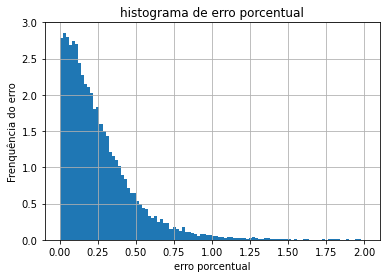

In [111]:
## Criando visualização

# criando histograma do erro porcentual
plt.hist(df1['erro_perc_abs'],bins=100, range=(0,2), density=True )

#criando e personalizando
plt.title("histograma de erro porcentual")
plt.xlabel('erro porcentual')
plt.ylabel('Frenquência do erro')
#criando grande
plt.grid(True)


#exibindo o hist

plt.show

# Voltando a aula...


In [112]:
# nomeando os parâmetros

# >>> MAPE é o erro percentual absoluto médio
# >>> MAE, Mean Absolut Error, ou "erro absoluto médio"

#Ou seja... 

MAPE = np.mean(df1['erro_perc_abs'])
MAE = np.mean(df1['erro_abs'])

In [114]:
print("MAPE: ", MAPE,'\n')
print('MAE: ', MAE)


MAPE:  0.25580512536186784 

MAE:  125921.54419398315


# Aula 2 - entendendo overfitting e underfitting

In [154]:
#primeiramente iremos separar nossos dados em 2 grupos, um de teste e um de treino

#recriando a feartures para treinar
X = df_raw.drop(['price','date' ], axis=1)


#recriando o response variable 
y = df_raw['price'].copy()



In [155]:
# separando os dados com uma função

x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

# Model Traning

In [156]:
# model descripition
model_lr = lm.LinearRegression()

#model train... Olhar documentação quando aos requesitos de entrada de dados
model_lr.fit( x_train, y_train )



LinearRegression()

In [157]:
# prediction - dados de treino 

#de treino
pred_train = model_lr.predict(x_train)

#de teste
pred_test = model_lr.predict(x_test)



# Performance


In [159]:
# MAE e MAPE de train
mae_train = m.mean_absolute_error( y_train, pred_train)
mape_train = np.mean(np.abs((y_train - pred_train)/y_train))

# MAE e MAPE de test
mae_test = m.mean_absolute_error( y_test, pred_test)
mape_test = np.mean(np.abs((y_test - pred_test)/y_test))


In [163]:
#crinado uma df para armazenar os resultados

data = {
    'Dataframe':['trainig', 'test'],
    'MAE': [mae_train,mae_test],
    'MAPE':[mape_train, mape_test]
}

pd.DataFrame(data)



,Dataframe,MAE,MAPE
0,trainig,125042.255205,0.25542
1,test,127474.102963,0.24959
